# EDA

In [47]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcdefaults()
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. 데이터 준비

In [49]:
df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177
1,1,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257
2,2,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362
3,3,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308
4,4,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080


### 상권별 데이터 분리

In [50]:
# 상권별로 구분
for i in range(1496):
    globals()['df_{}'.format(i)] = df[df['상권코드_'+str(i)] == 1]

In [51]:
df_0

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
1474,1474,2020.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,308310.0,26.0,69.0,249322039.0,1800.000000,73.0,4.046282e+09,842.0,2.000000
2949,2949,2020.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,336343.0,26.0,69.0,249322039.0,1800.000000,73.0,5.560254e+09,842.0,5.583756
4424,4424,2019.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,457213.0,29.0,75.0,249484517.0,1800.000000,73.0,6.001523e+09,842.0,0.913242
5917,5917,2019.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,409966.0,29.0,75.0,249484517.0,1806.000000,73.0,3.751288e+09,609.0,1.382488
7410,7410,2019.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,416759.0,29.0,75.0,249484517.0,1806.000000,73.0,3.329090e+09,609.0,4.651163
8902,8902,2019.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,380891.0,29.0,75.0,249484517.0,1806.000000,73.0,3.373980e+09,348.0,1.843318
10245,10245,2018.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,201111.0,29.0,75.0,249484517.0,1806.000000,73.0,7.043871e+09,829.0,2.764977
11588,11588,2018.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,168252.0,29.0,75.0,249484517.0,1811.000000,73.0,4.607095e+09,829.0,2.358491
12931,12931,2018.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,166825.0,29.0,75.0,249484517.0,1811.000000,73.0,5.037827e+09,829.0,1.960784
14272,14272,2018.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,188508.0,29.0,75.0,249484517.0,1827.000000,73.0,3.844095e+09,831.0,2.538071


### 연도, 분기 결합하여 하나의 column으로 생성

In [52]:
# 연도, 분기 추출
year = list(df_0['기준_년_코드'])
month = list(df_0['기준_분기_코드'])

# (연도, 분기) list 생성
year_month = [i for i in zip(year,month)]
year_month

# '연도_분기' list 생성
# 1분기 = 3월 1일, 2분기 = 6월 1일, 3분기 = 9월 1일, 4분기 = 12월 1일
y_m = []
for i in range(len(year_month)):
    month = ''
    if int(year_month[i][1]) == 1:
        month = 3
    elif int(year_month[i][1]) == 2:
        month = 6
    elif int(year_month[i][1]) == 3:
        month = 9
    else :
        month = 12
    a = str(int(year_month[i][0])) + '-' + str(month) + '-1'
    y_m.append(a)


In [53]:
df_0.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '상권코드_0', '상권코드_1', '상권코드_2',
       '상권코드_3', '상권코드_4', '상권코드_5', '상권코드_6',
       ...
       '상권코드_1495', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률'],
      dtype='object', length=1508)

In [54]:
# 새로운 column 추가
df_0_date = df_0.copy()
df_0_date['Date'] = y_m
df_0_date['Date'] = df_0_date['Date'].astype('datetime64[ns]')
df_0_date = df_0_date.set_index('Date')
df_0_date = df_0_date[['총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가', '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률']]

In [55]:
df_0_date.head()

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
Date,,,,,,,,,
2020-06-01,308310.0,26.0,69.0,249322039.0,1800.0,73.0,4.046282e+09,842.0,2.000000
2020-03-01,336343.0,26.0,69.0,249322039.0,1800.0,73.0,5.560254e+09,842.0,5.583756
2019-12-01,457213.0,29.0,75.0,249484517.0,1800.0,73.0,6.001523e+09,842.0,0.913242
2019-09-01,409966.0,29.0,75.0,249484517.0,1806.0,73.0,3.751288e+09,609.0,1.382488
2019-06-01,416759.0,29.0,75.0,249484517.0,1806.0,73.0,3.329090e+09,609.0,4.651163


### 각 column 별로 Series 생성

In [56]:
# s_1 = 총 유동인구 수 series ....... s_7 = 총 직장인구 수 series
for i in range(df_0_date.shape[1]):
    globals()["s_{}".format(i)] = df_0_date.iloc[:,i]

In [57]:
s_0

Date
2020-06-01    308310.0
2020-03-01    336343.0
2019-12-01    457213.0
2019-09-01    409966.0
2019-06-01    416759.0
2019-03-01    380891.0
2018-12-01    201111.0
2018-09-01    168252.0
2018-06-01    166825.0
2018-03-01    188508.0
2017-12-01    188580.0
2017-09-01    232637.0
2017-06-01    156039.0
2017-03-01    163110.0
2016-12-01     83755.0
2016-09-01     92055.0
2016-06-01     88175.0
2016-03-01     76823.0
2015-12-01     74923.0
2015-09-01     64015.0
2015-06-01    110317.0
2015-03-01    107573.0
Name: 총_유동인구_수, dtype: float64

## 2. EDA 과정

### (1) 상권 '0'의 총 유동인구 추세

Text(0, 0.5, '총 유동인구 수')

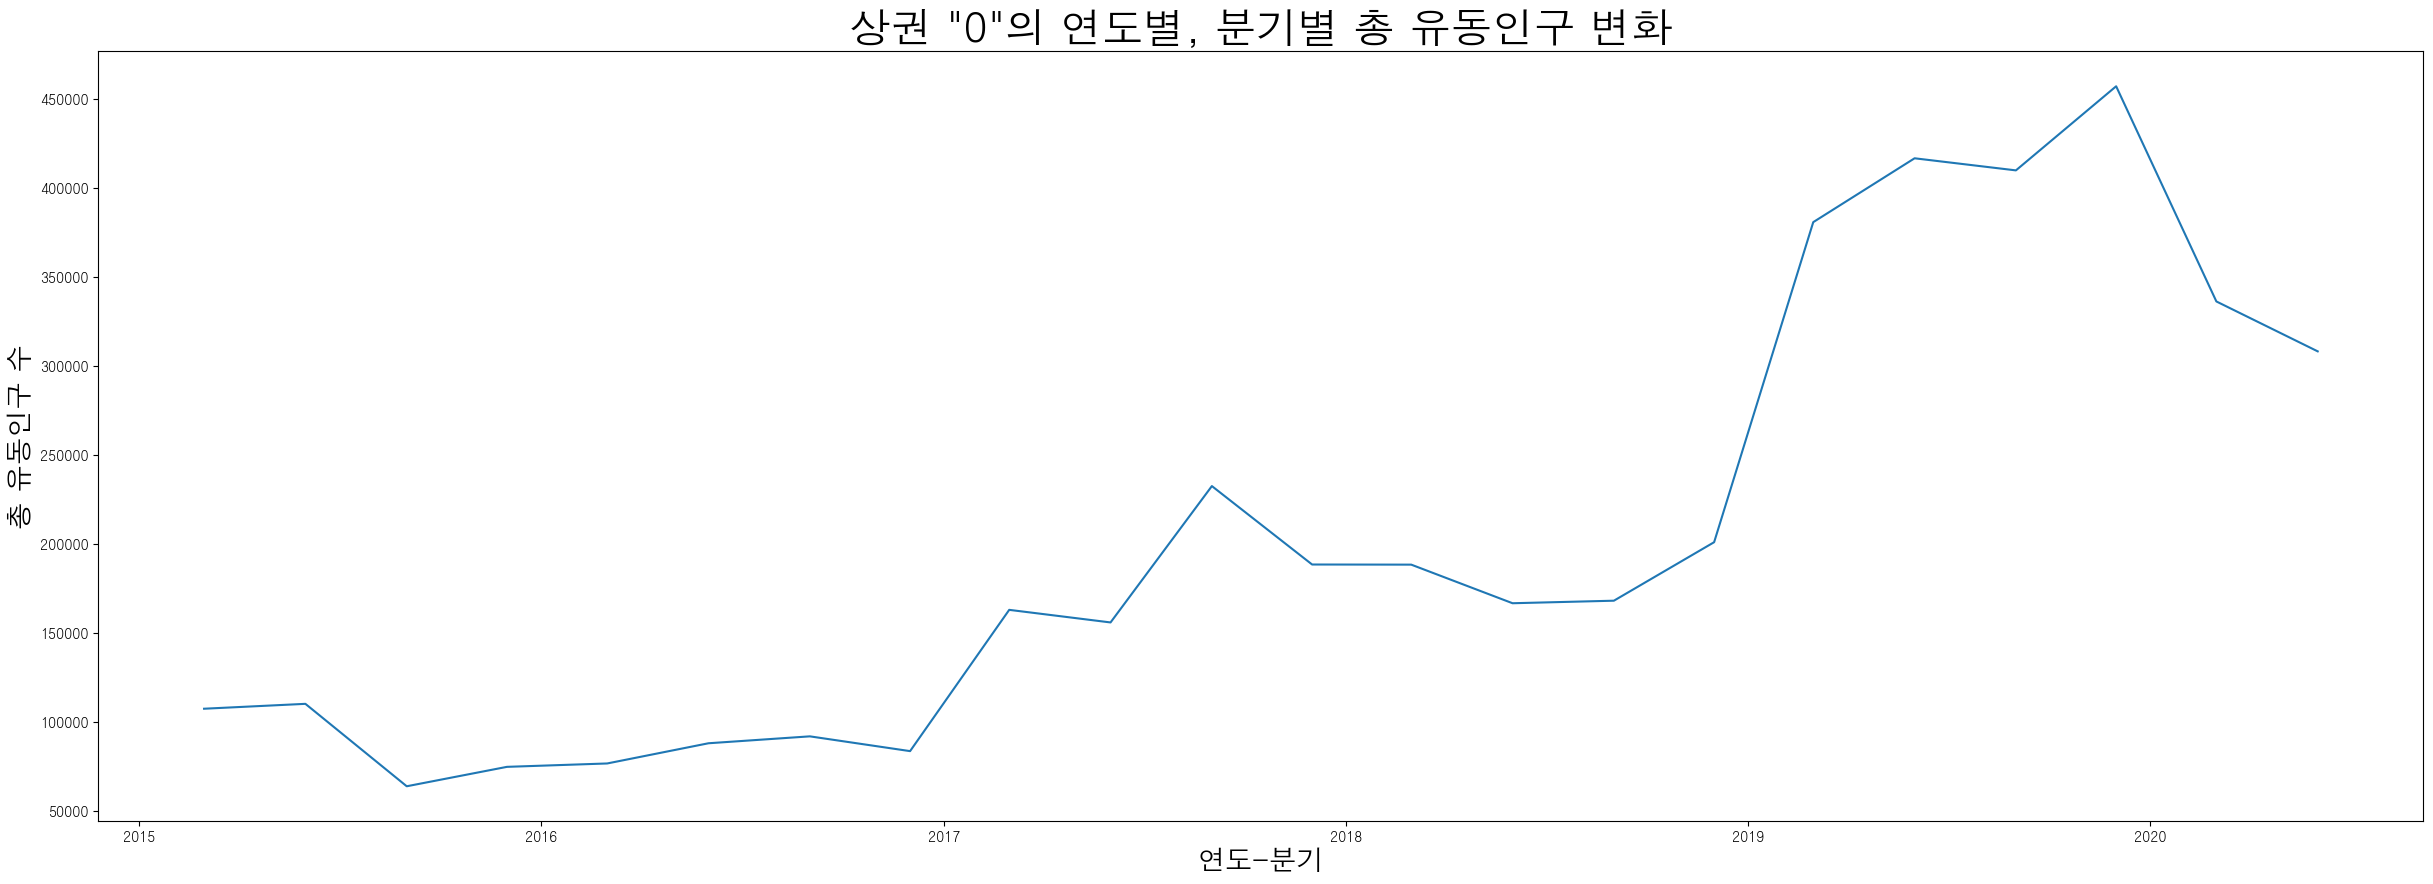

In [59]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_0)
plt.title('상권 "0"의 연도별, 분기별 총 유동인구 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('총 유동인구 수', size = 20)

### (2) 상권 '0'의 아파트 단지 수 추세

Text(0, 0.5, '아파트 단지 수')

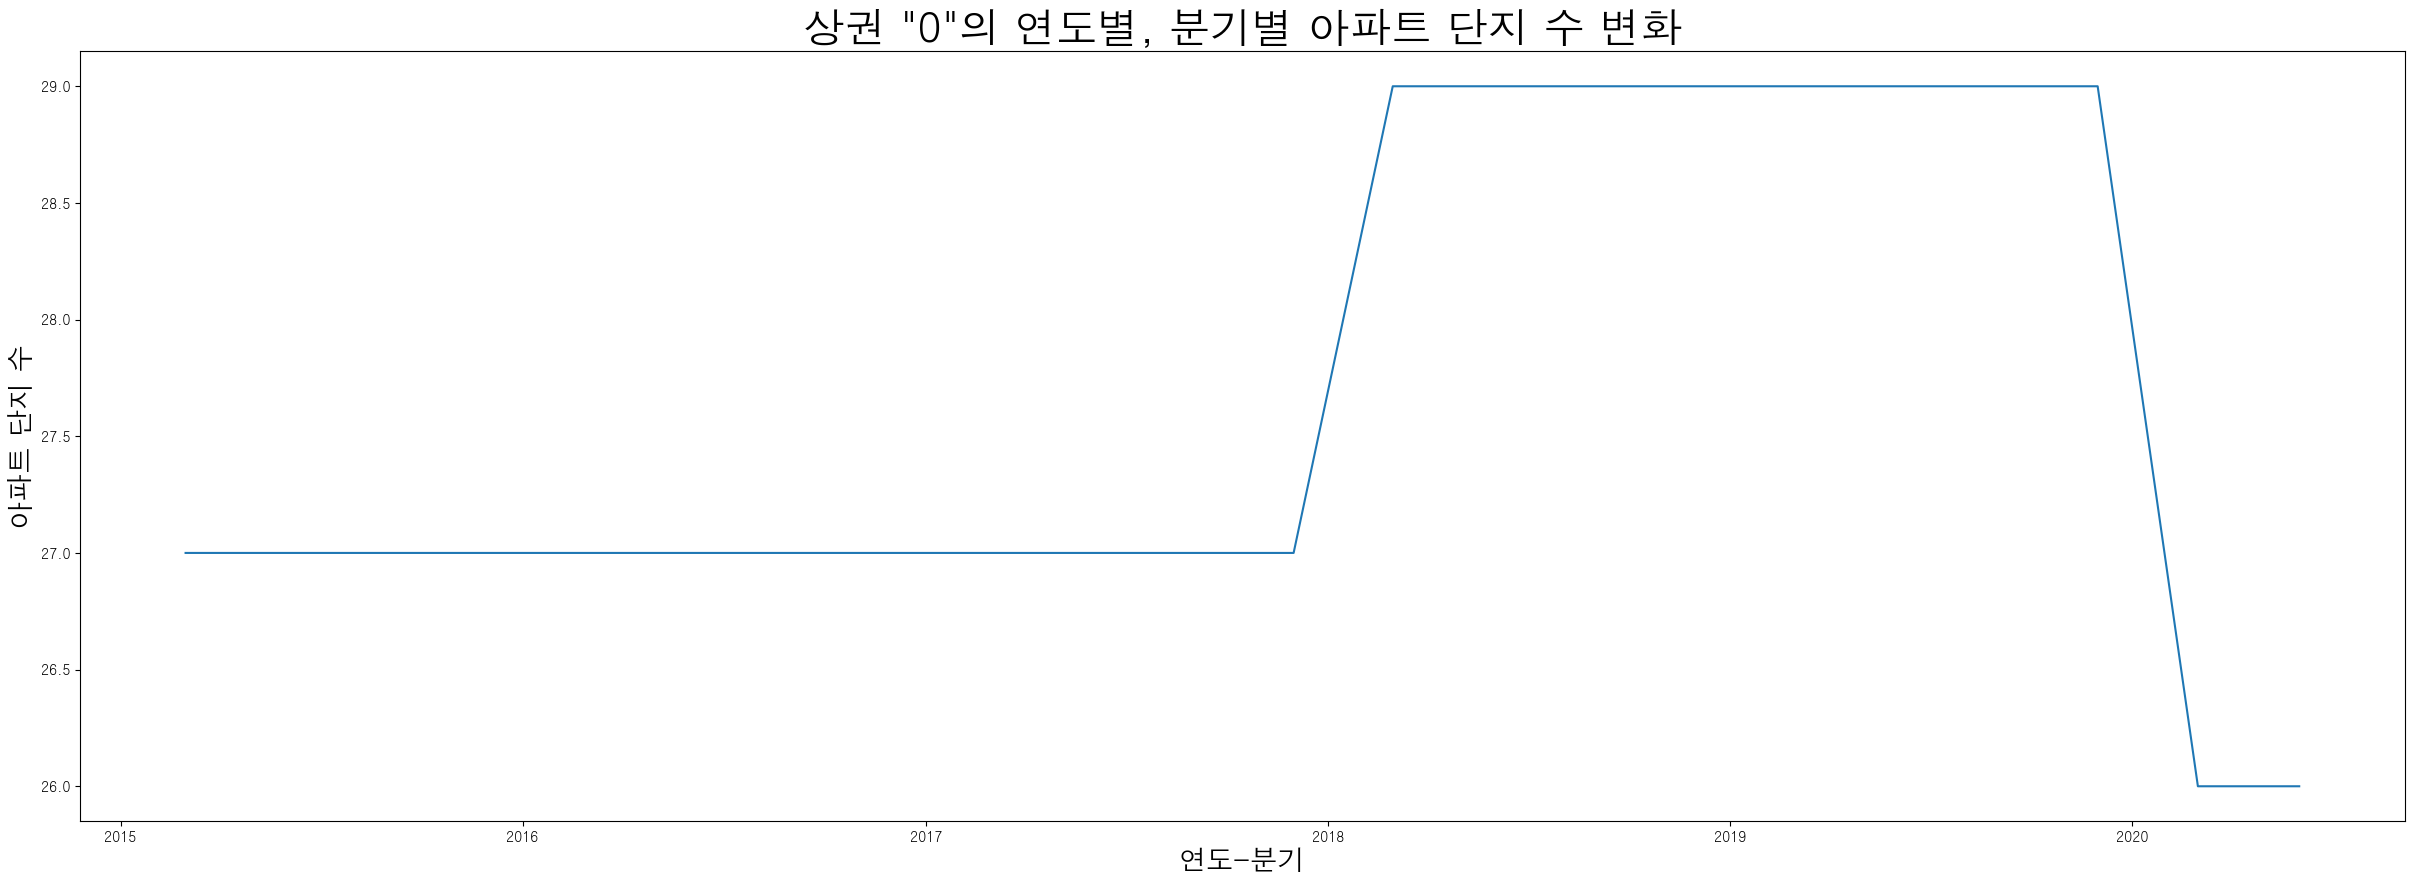

In [60]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_1)
plt.title('상권 "0"의 연도별, 분기별 아파트 단지 수 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('아파트 단지 수', size = 20)

### (3) 상권 '0'의 아파트 평균 면적 추세

Text(0, 0.5, '아파트 평균 면적')

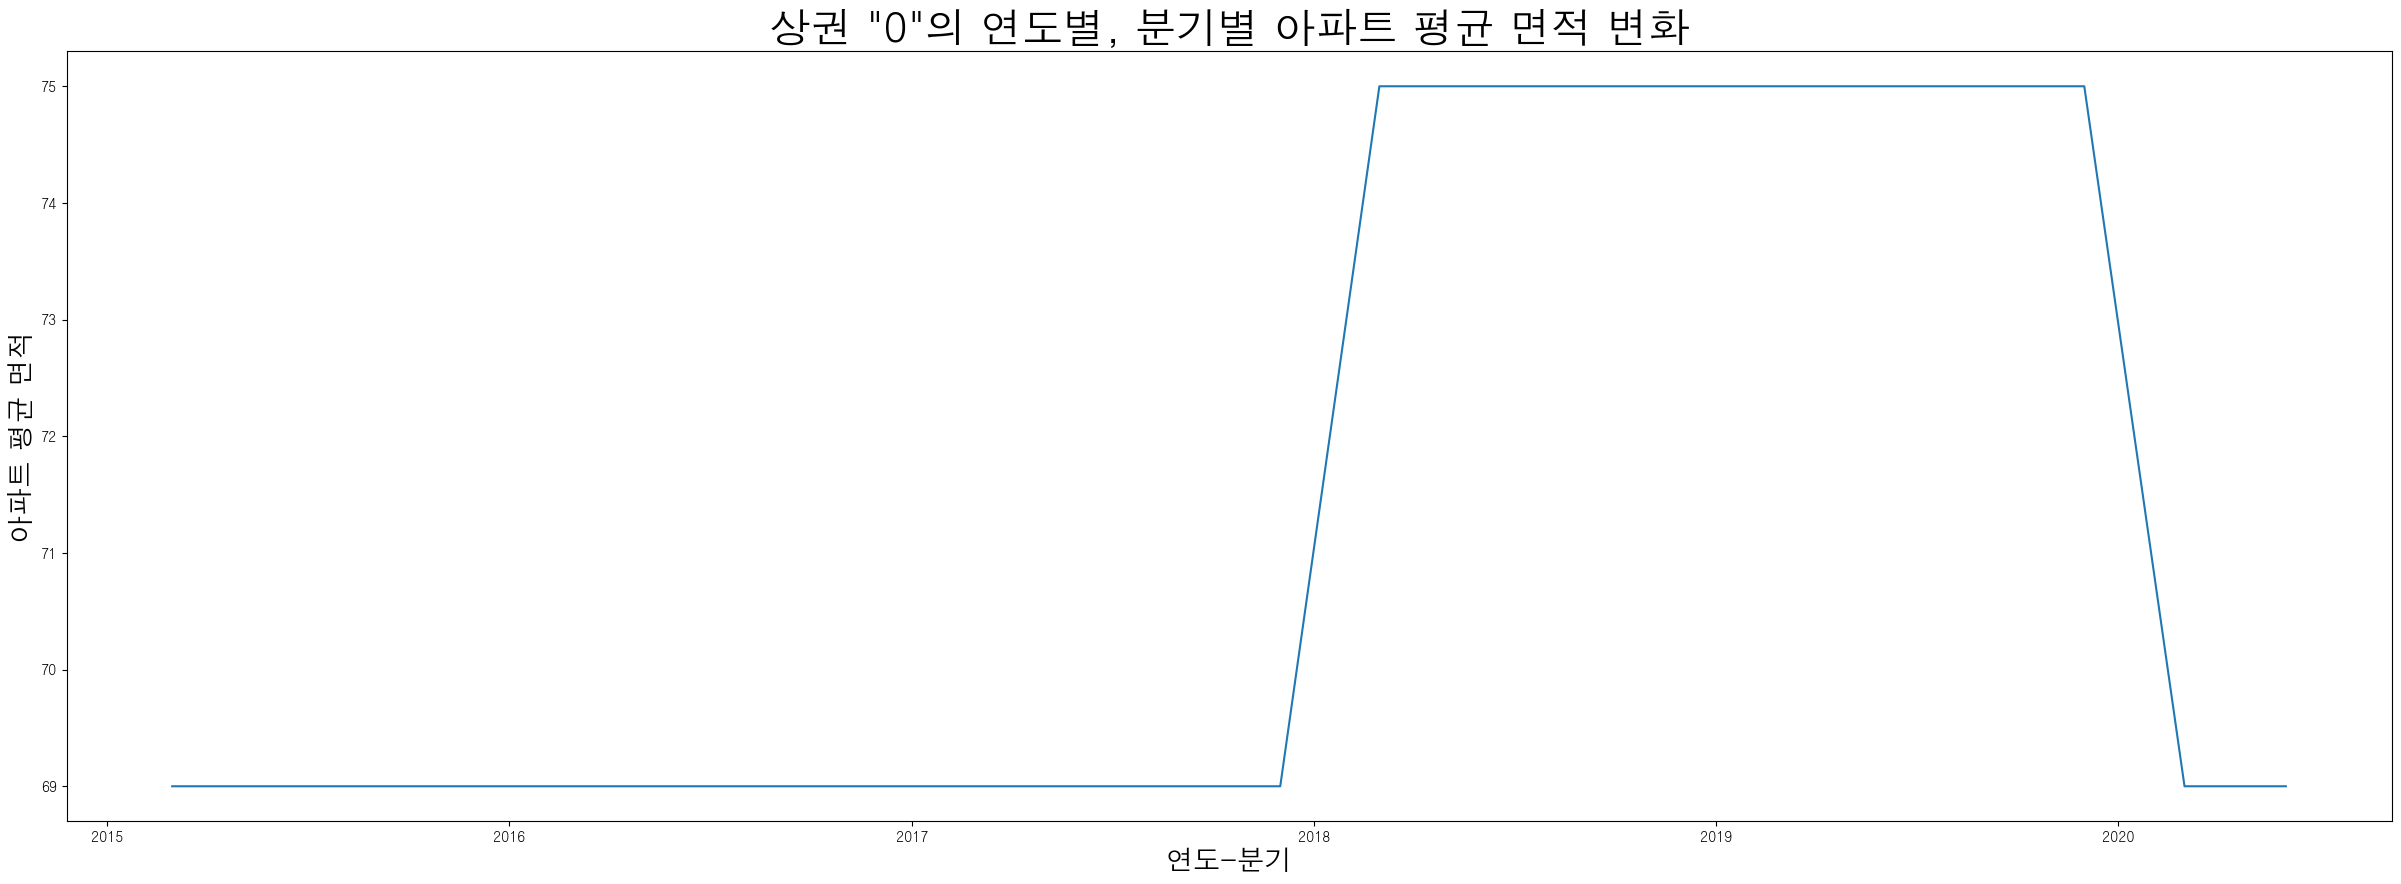

In [61]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_2)
plt.title('상권 "0"의 연도별, 분기별 아파트 평균 면적 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('아파트 평균 면적', size = 20)

### (4) 상권 '0'의 아파트 평균 시가 추세

Text(0, 0.5, '아파트 평균 시가')

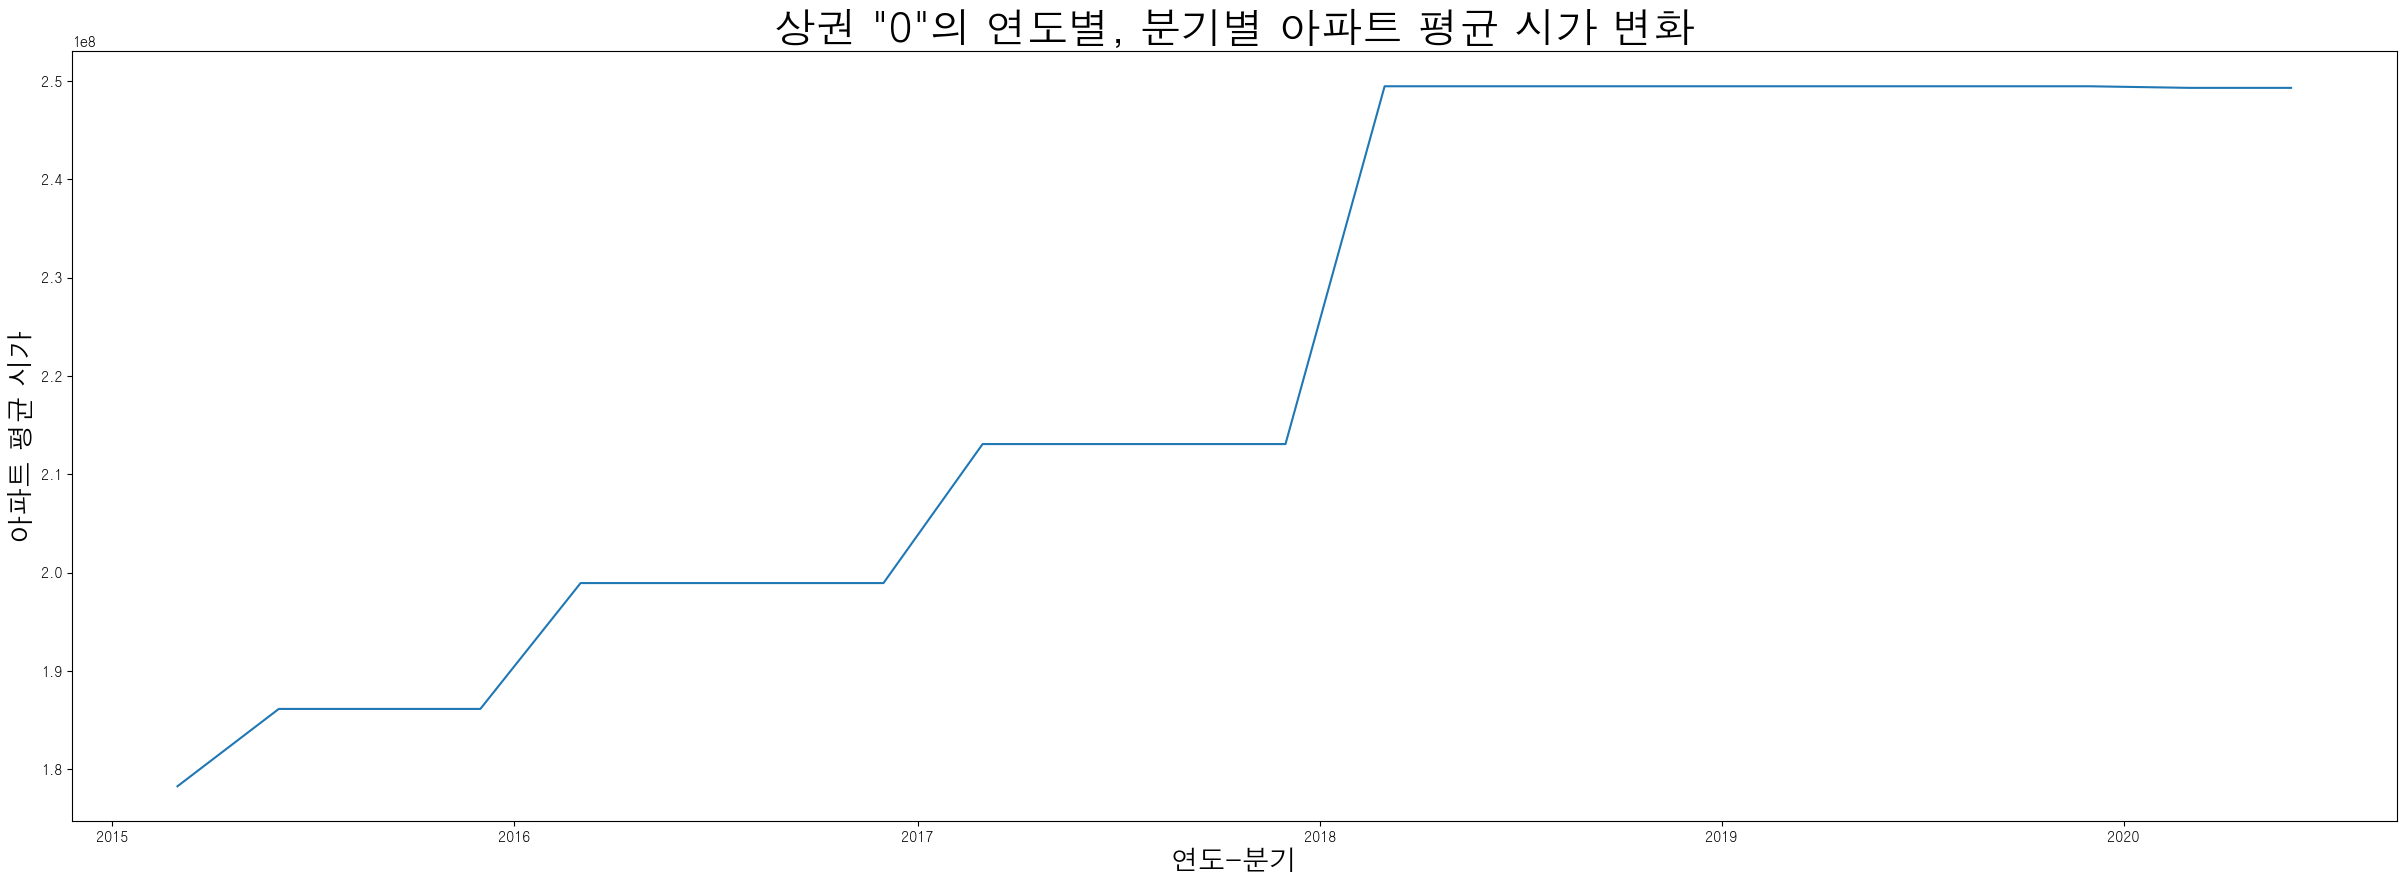

In [62]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_3)
plt.title('상권 "0"의 연도별, 분기별 아파트 평균 시가 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('아파트 평균 시가', size = 20)

### (5) 상권 '0'의 총 상주인구 수 추세

Text(0, 0.5, '총 상주인구 수')

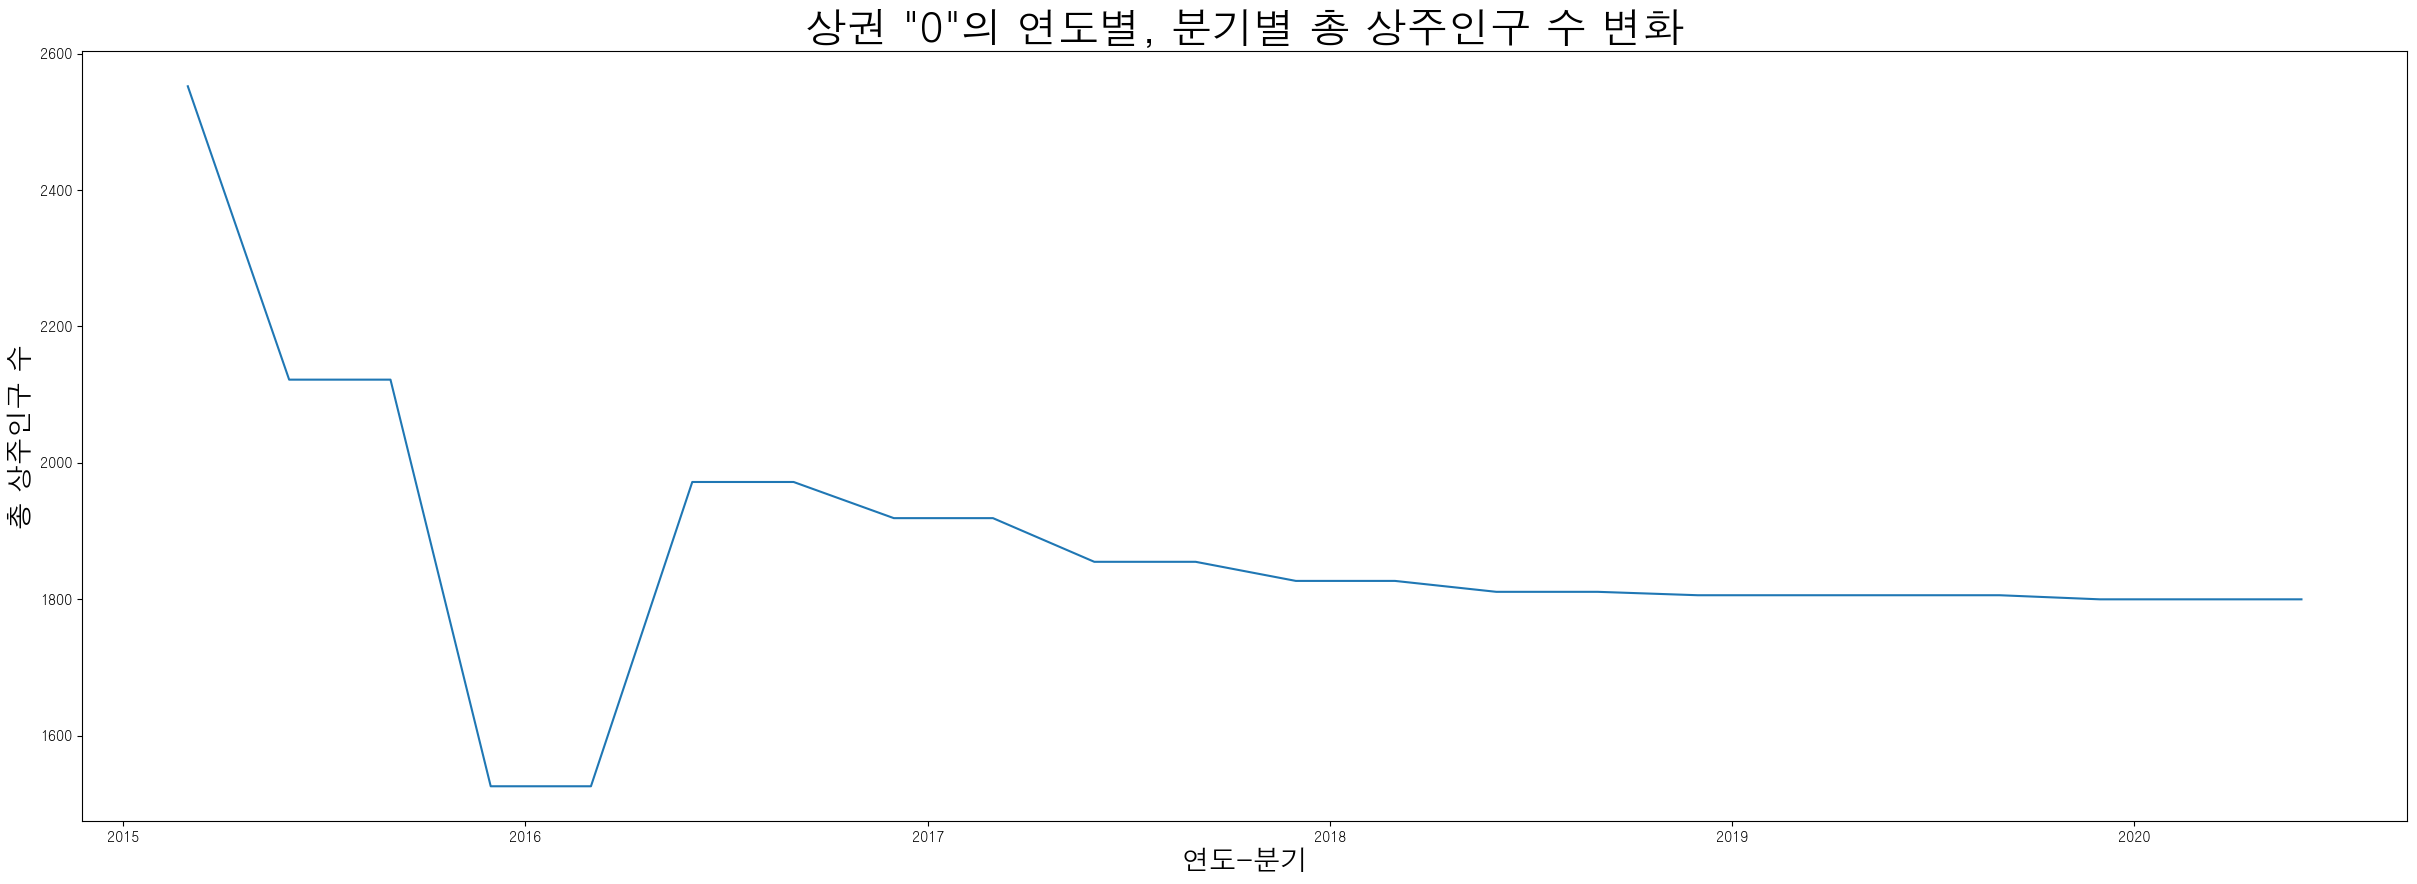

In [63]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_4)
plt.title('상권 "0"의 연도별, 분기별 총 상주인구 수 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('총 상주인구 수', size = 20)

### (6) 상권 '0'의 집객시설 수 추세 

Text(0, 0.5, '집객시설 수')

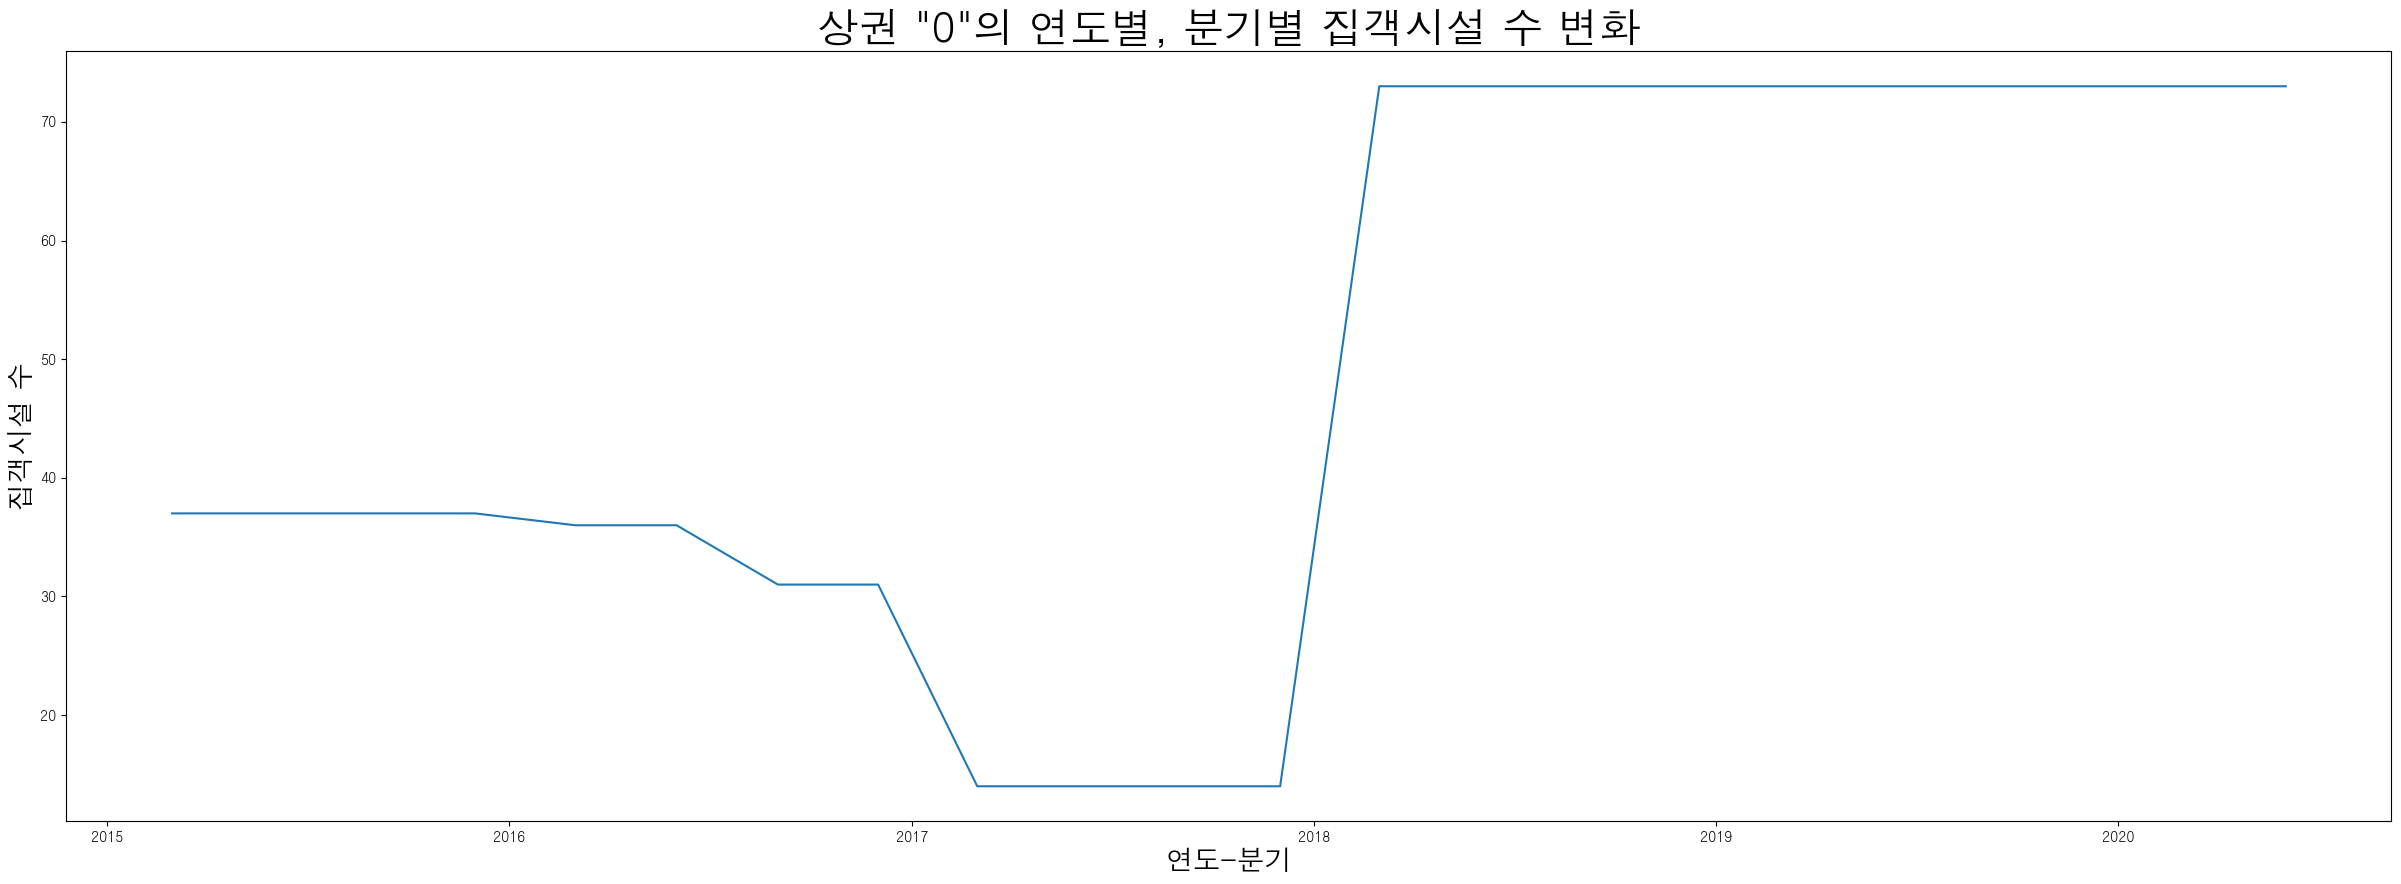

In [64]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_5)
plt.title('상권 "0"의 연도별, 분기별 집객시설 수 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('집객시설 수', size = 20)

### (7) 상권 '0'의 추정매출 추세 

Text(0, 0.5, '추정매출')

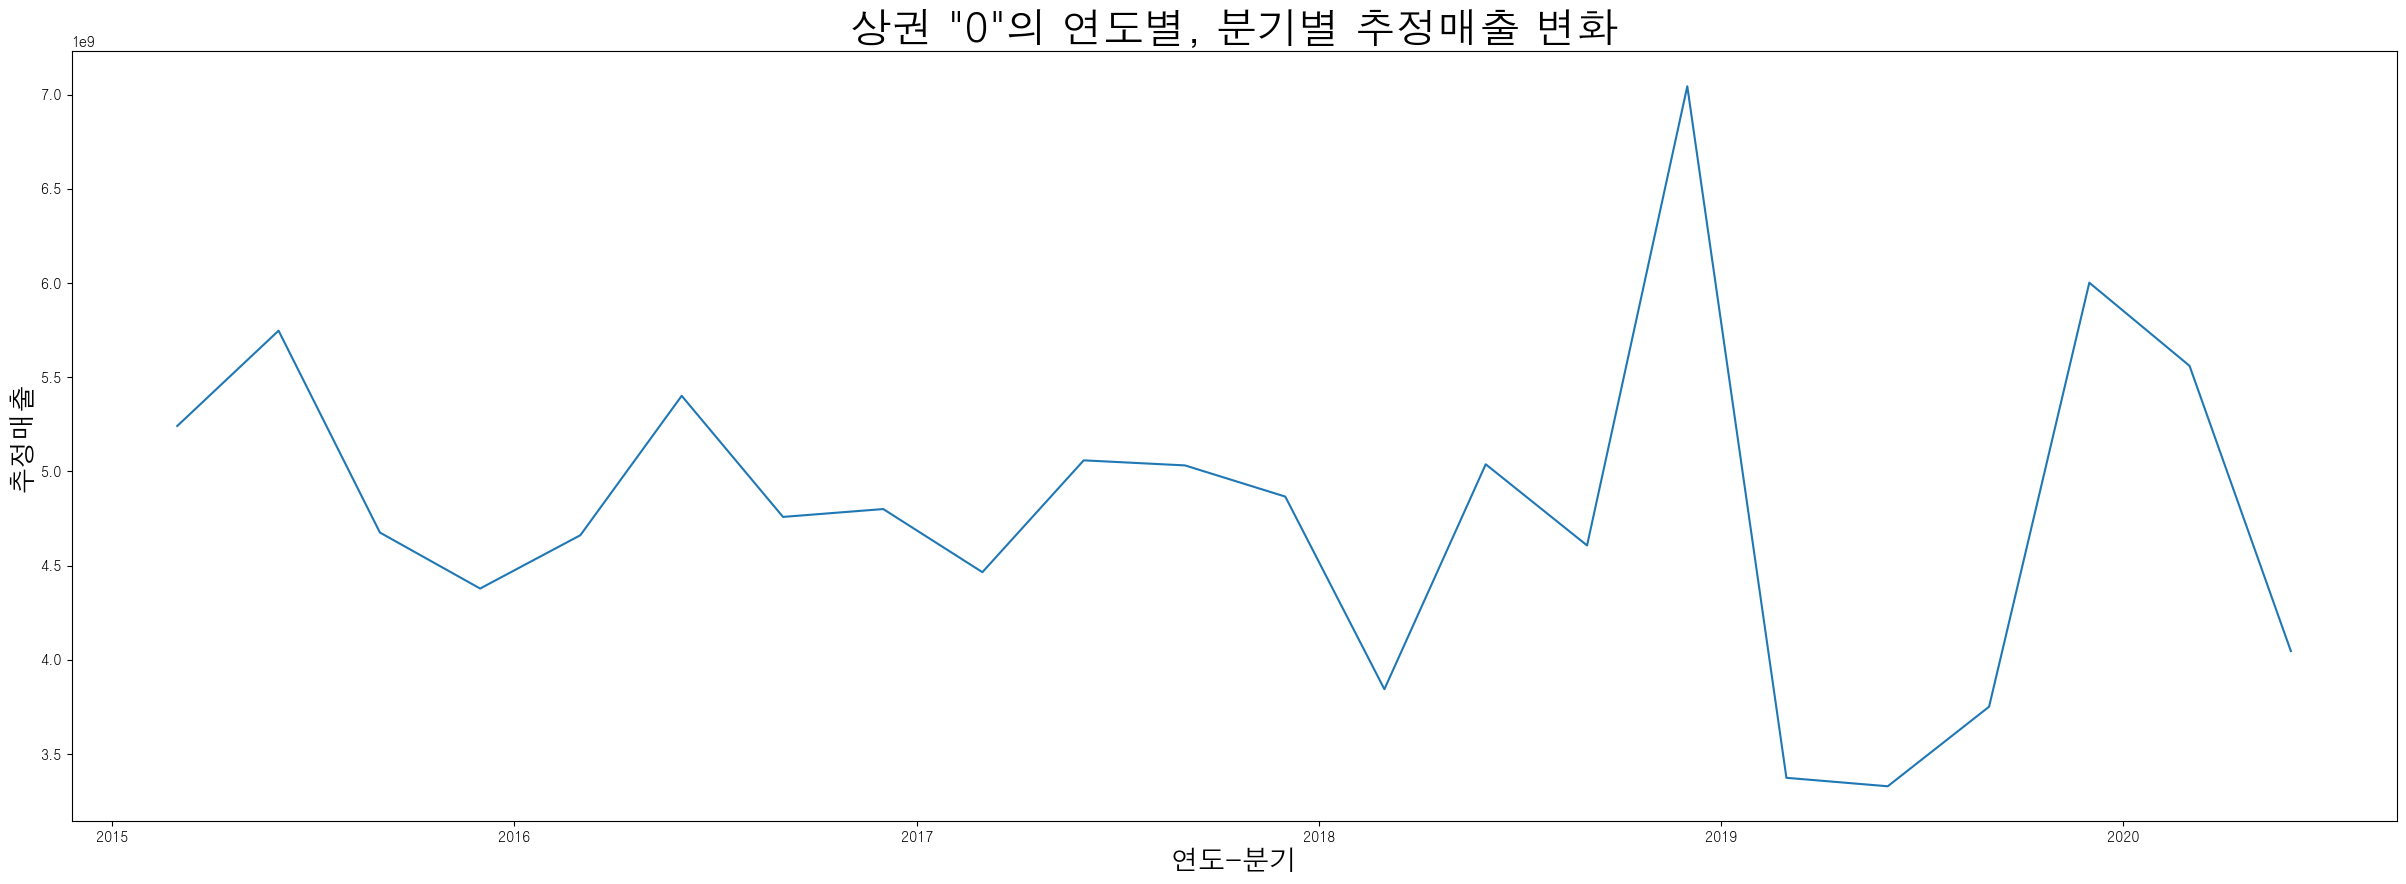

In [65]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_6)
plt.title('상권 "0"의 연도별, 분기별 추정매출 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('추정매출', size = 20)

### (8) 상권 '0'의 총 직장인구 수 추세

Text(0, 0.5, '총 직장인구 수')

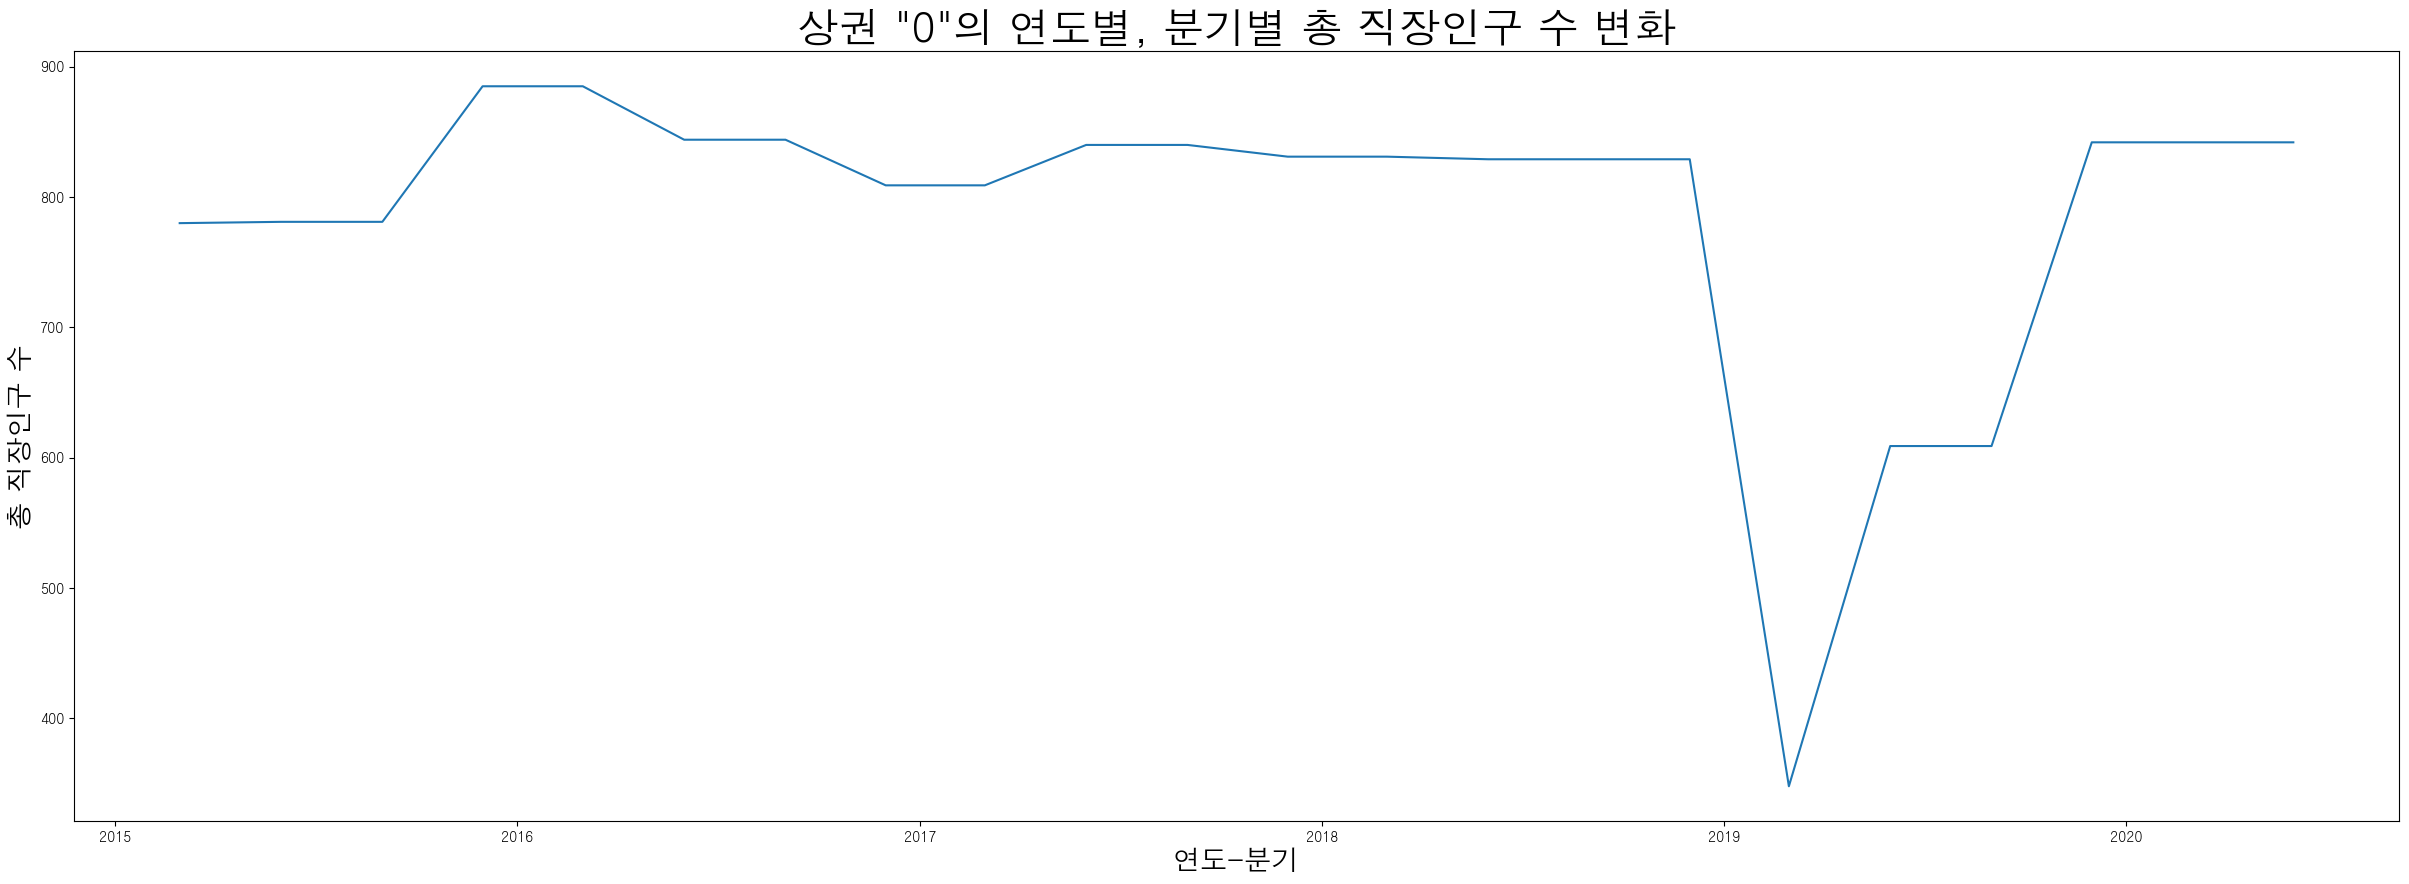

In [66]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_7)
plt.title('상권 "0"의 연도별, 분기별 총 직장인구 수 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('총 직장인구 수', size = 20)

### (9) 상권 '0'의 폐업률 추세

Text(0, 0.5, '폐업률')

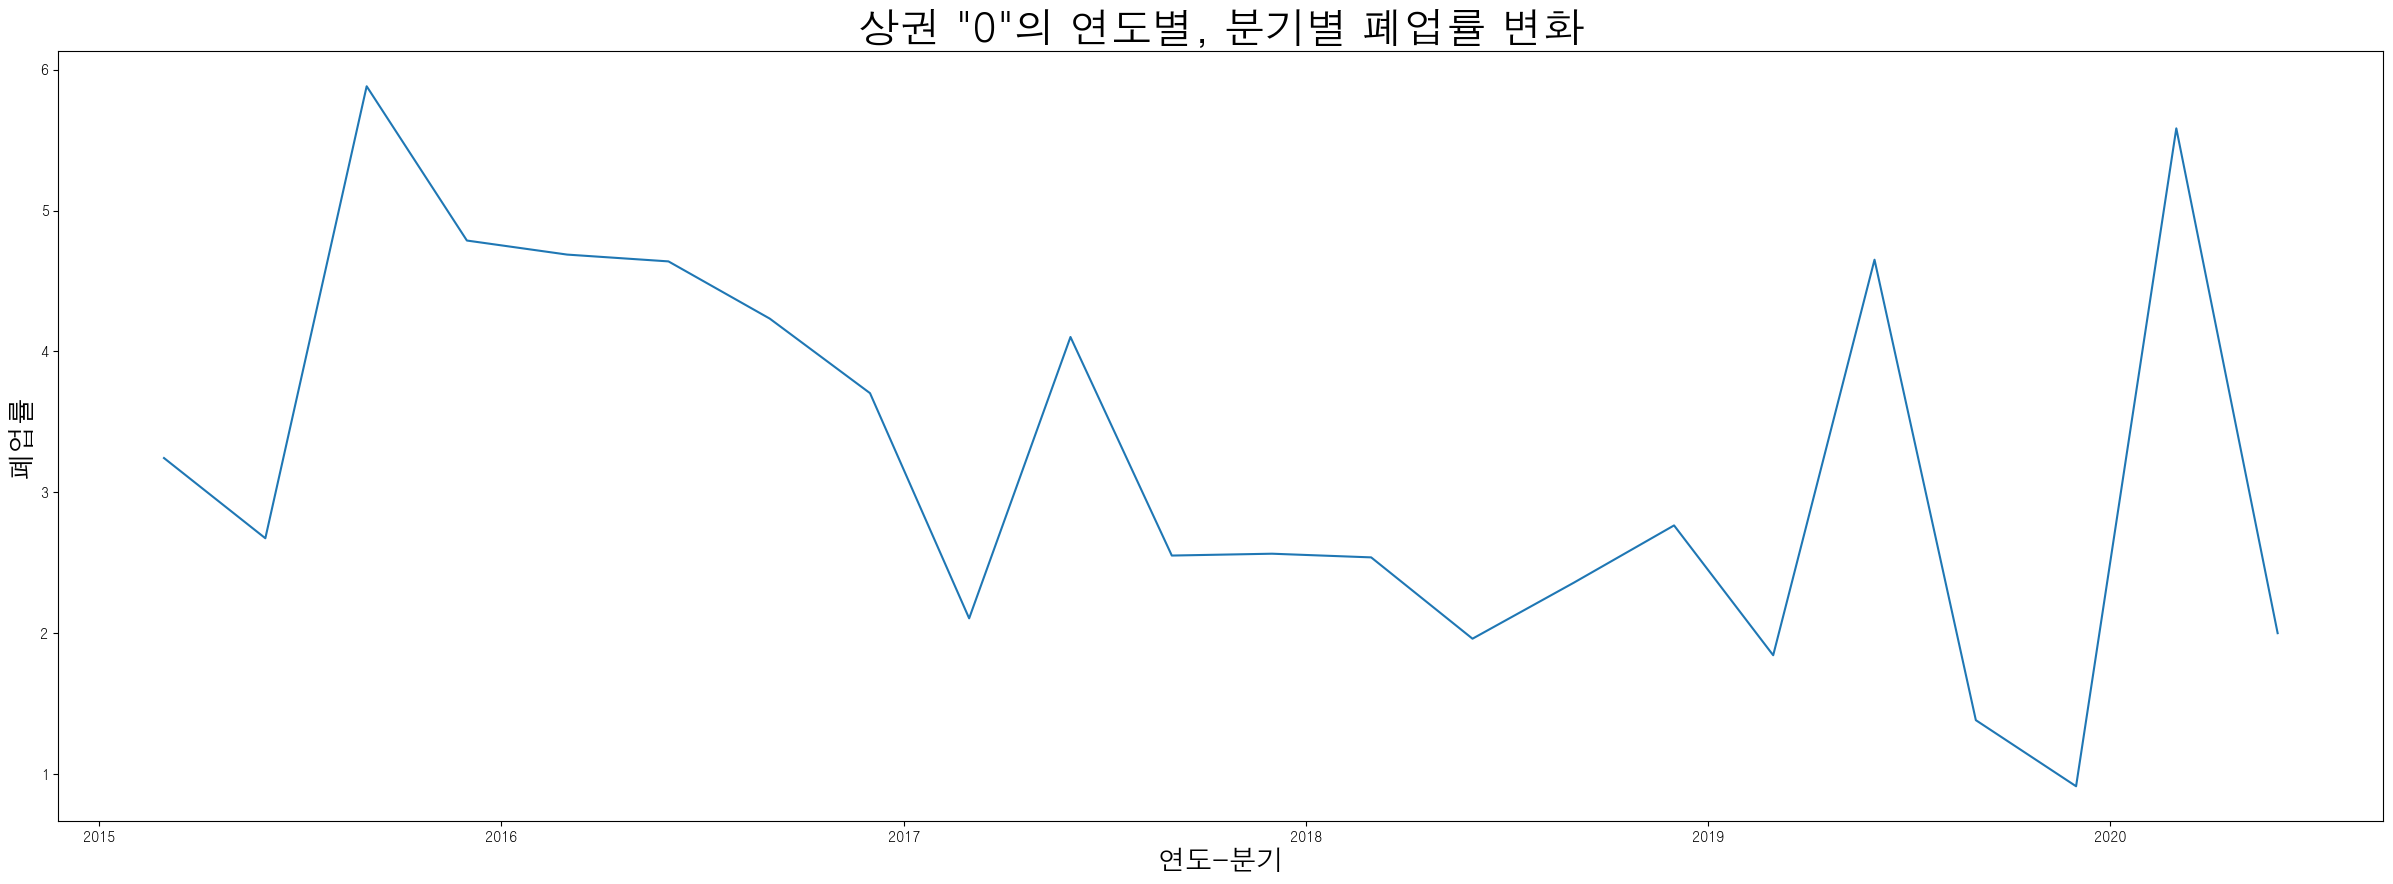

In [67]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_8)
plt.title('상권 "0"의 연도별, 분기별 폐업률 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('폐업률', size = 20)